In [3]:
!pip install -q yfinance

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime
# The tech stocks we'll use for this analysis
tech_list = ['MSFT', 'AMZN' , 'NVDA' , 'GOLD']

# Set up End and Start times for data grab
tech_list = ['MSFT', 'AMZN' , 'NVDA' , 'GOLD']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [MSFT, AMZN, NVDA, GOLD]
company_name = ["MICROSOFT", "AMAZON" , "NVDA" , "GOLD"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(5)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-04-24,282.089996,284.950012,278.720001,281.769989,279.476227,26611000,MICROSOFT
2023-04-25,279.510010,281.600006,275.369995,275.420013,273.177948,45772200,MICROSOFT
2023-04-26,296.700012,299.570007,292.730011,295.369995,292.965546,64599200,MICROSOFT
2023-04-27,295.970001,305.200012,295.250000,304.829987,302.348541,46462600,MICROSOFT
2023-04-28,304.010010,308.929993,303.309998,307.260010,304.758789,36446700,MICROSOFT


# Descriptive Statistics about the Data
.describe() generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [5]:
# Summary Stats
MSFT.describe()


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,358.625777,361.637332,355.493386,358.667809,357.508865,2.489331e+07
std,38.324883,38.175204,38.075299,38.222499,38.893610,9.556305e+06
min,279.510010,281.600006,275.369995,275.420013,273.177948,1.017660e+07
25%,328.835007,331.880005,325.700012,328.390015,326.629700,1.939050e+07
50%,345.679993,347.420013,339.829987,345.109985,343.048889,2.237330e+07
75%,397.889999,400.000000,393.759995,398.125000,397.390137,2.709960e+07
max,429.829987,430.820007,427.160004,429.369995,429.369995,7.847820e+07


# Information About the Data

In [4]:
 #General info
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-02-21 to 2024-02-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


# Closing Price

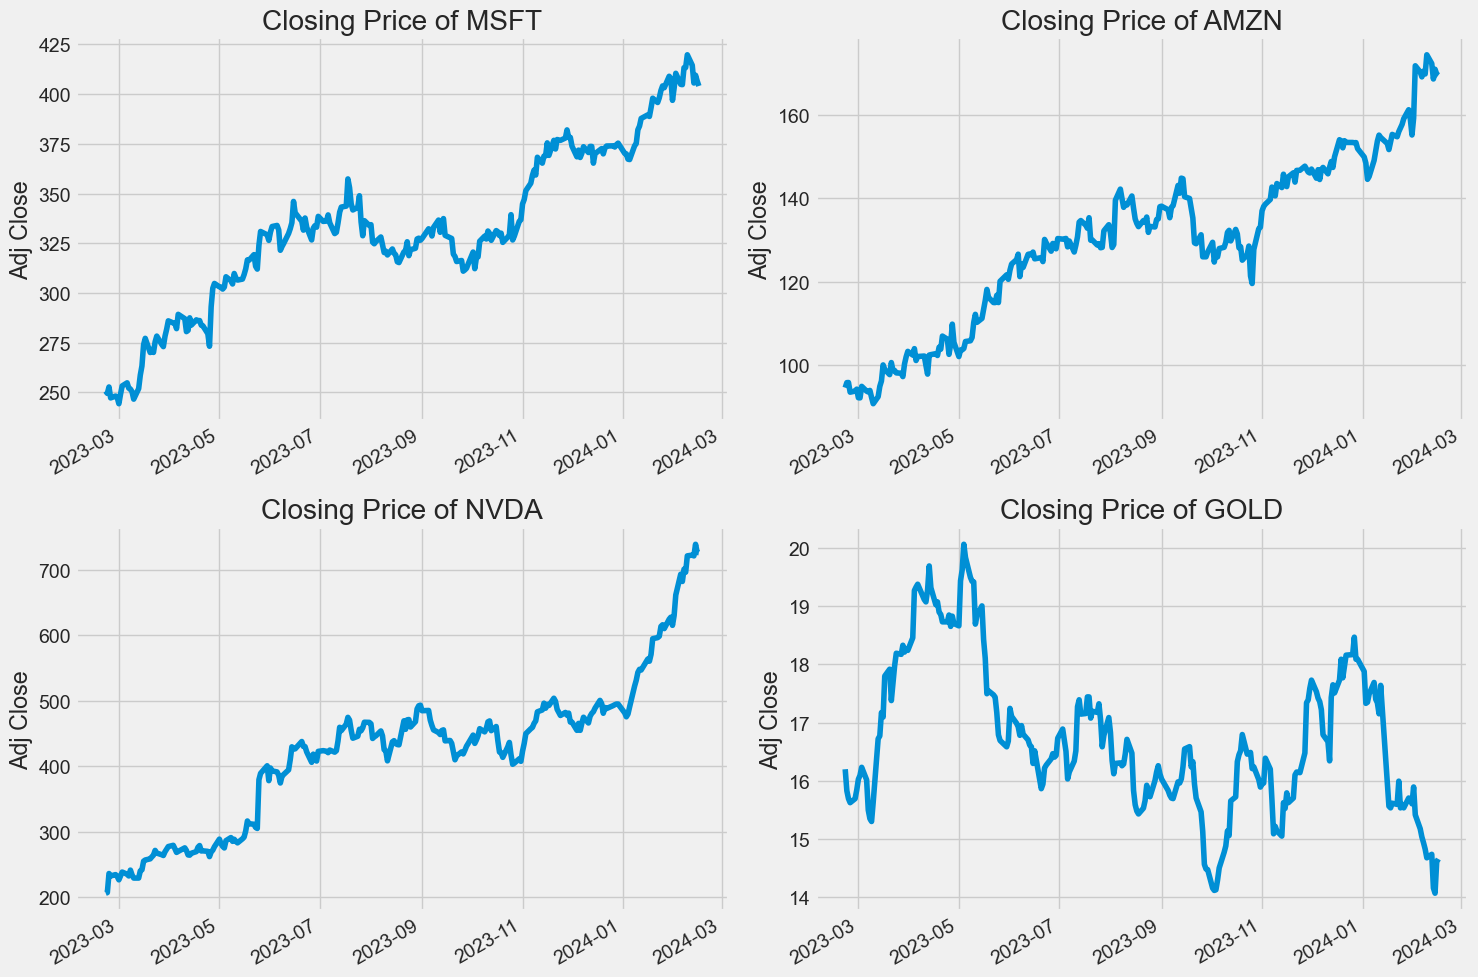

In [5]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

# Volume of Sales

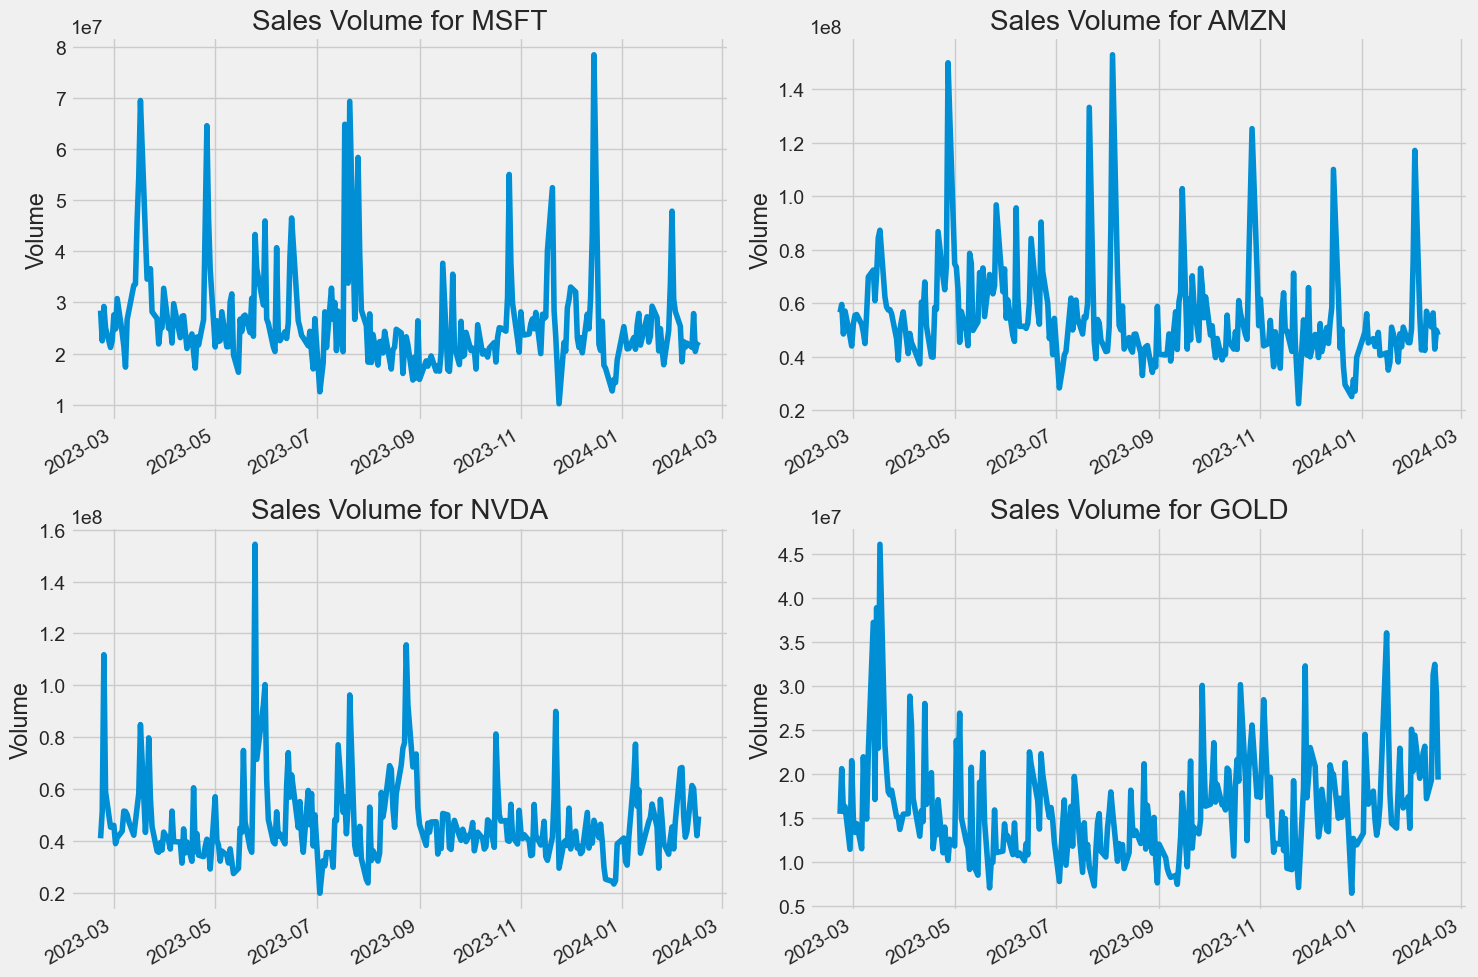

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

#  The moving average of the various stocks

Text(0.5, 1.0, 'GOLD')

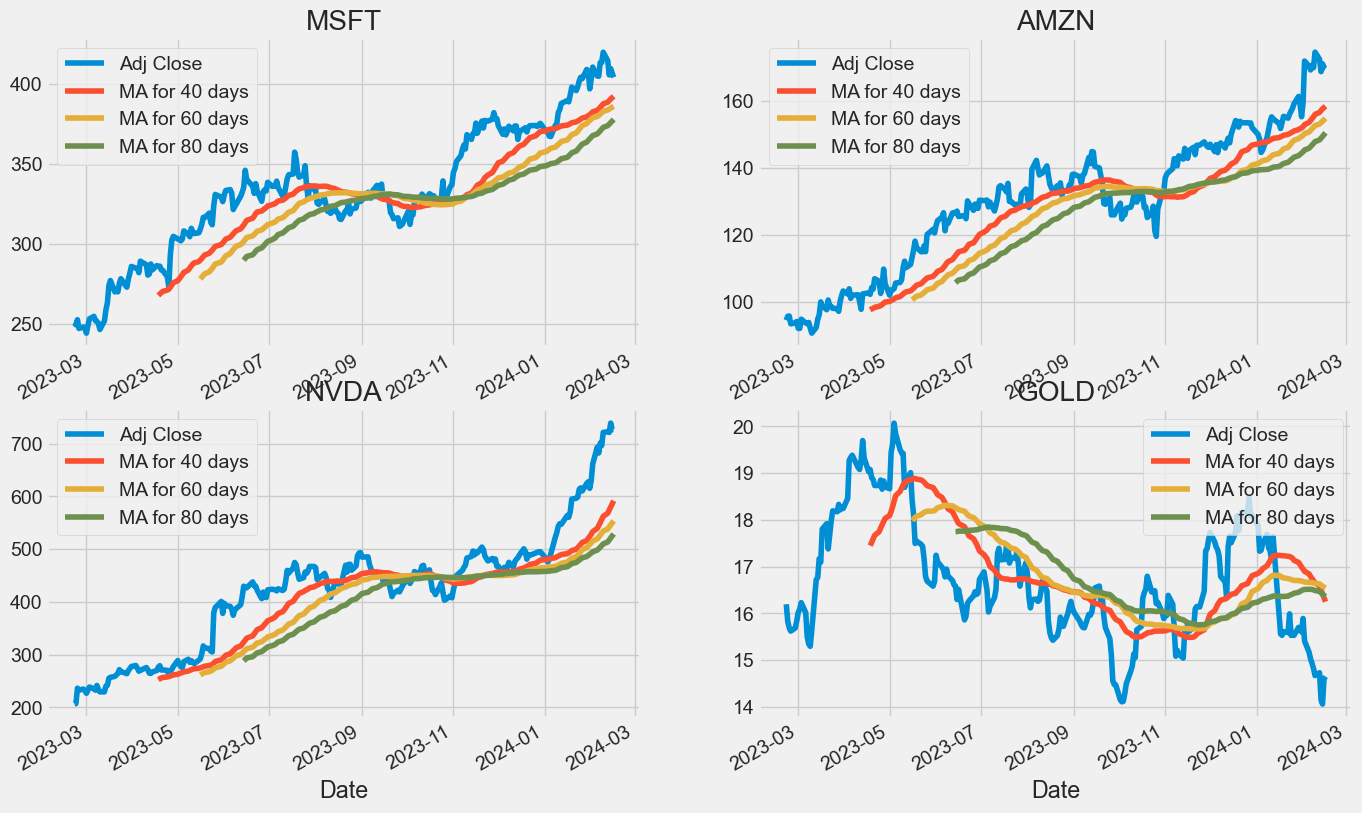

In [7]:
ma_day = [40, 60, 80]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
MSFT[['Adj Close', 'MA for 40 days', 'MA for 60 days', 'MA for 80 days']].plot(ax=axes[0,0])
axes[0,0].set_title('MSFT')

AMZN[['Adj Close', 'MA for 40 days', 'MA for 60 days', 'MA for 80 days']].plot(ax=axes[0,1])
axes[0,1].set_title('AMZN')

NVDA[['Adj Close', 'MA for 40 days', 'MA for 60 days', 'MA for 80 days']].plot(ax=axes[1,0])
axes[1,0].set_title('NVDA')

GOLD[['Adj Close', 'MA for 40 days', 'MA for 60 days', 'MA for 80 days']].plot(ax=axes[1,1])
axes[1,1].set_title('GOLD')


# The daily return of the stock on average

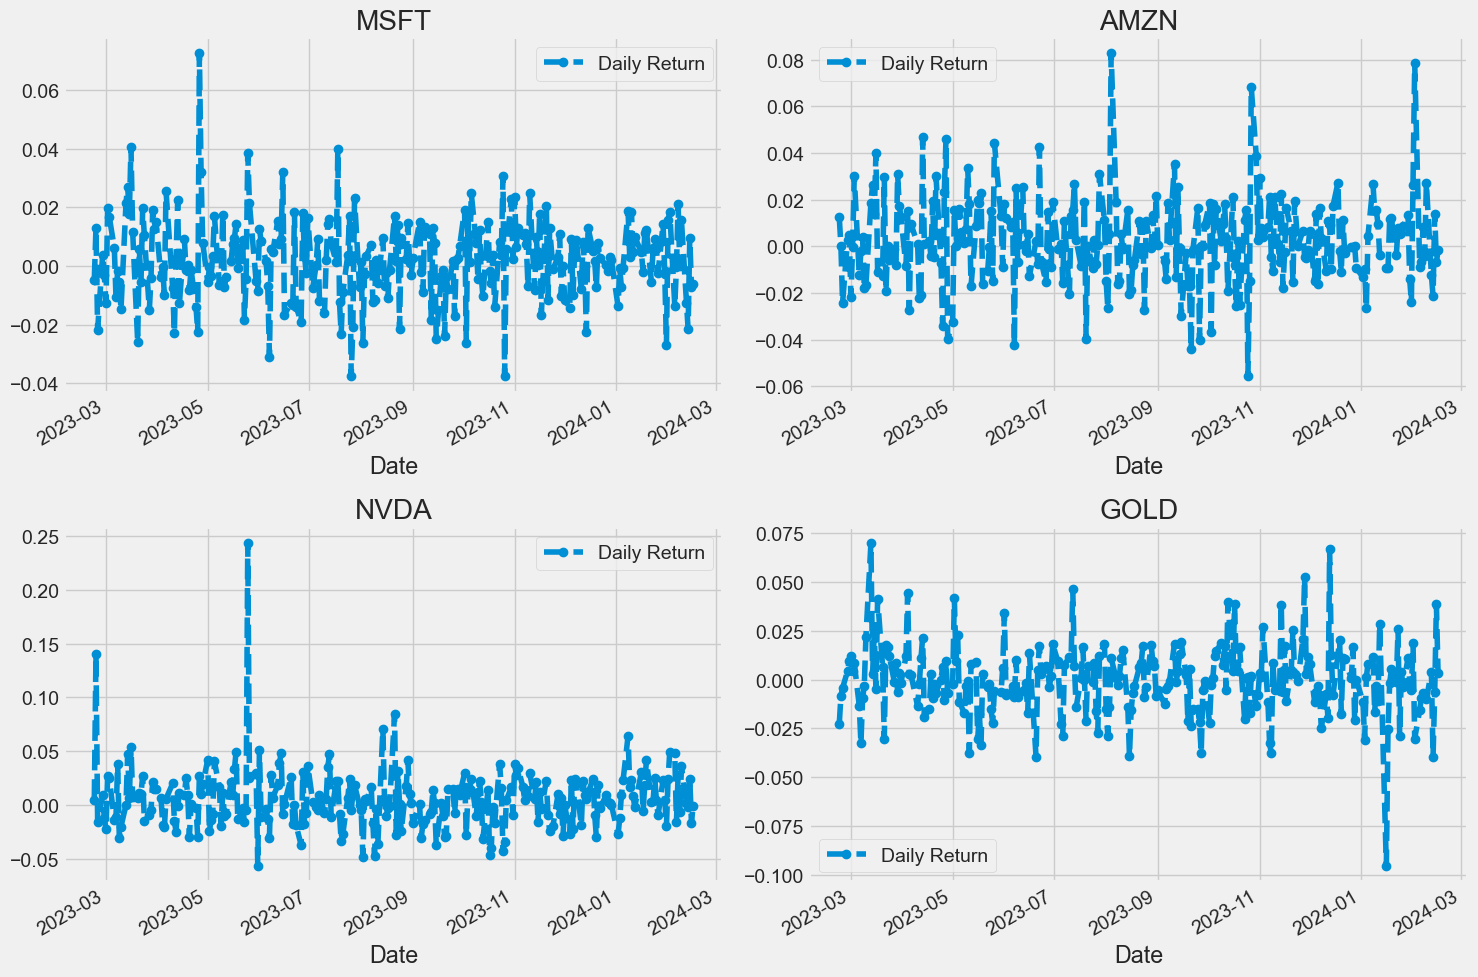

In [8]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

MSFT['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('MSFT')

AMZN['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('AMZN')

NVDA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('NVDA')

GOLD['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('GOLD')

fig.tight_layout()

let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

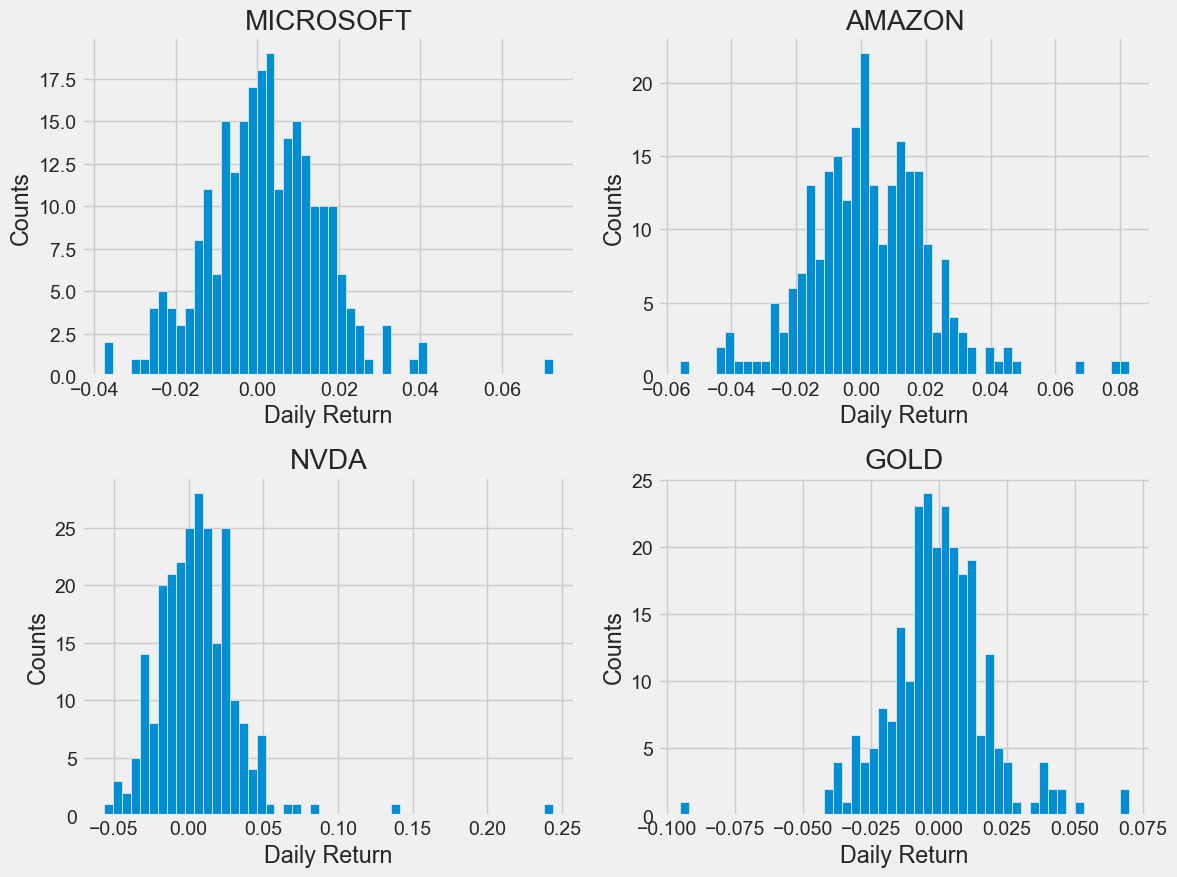

In [9]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()


# The correlation between different stocks closing prices.

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AMZN,GOLD,MSFT,NVDA
Date,,,,
2023-02-21,NaN,NaN,NaN,NaN
2023-02-22,0.012793,-0.022906,-0.004591,0.004793
2023-02-23,0.000313,-0.008637,0.012962,0.140214
2023-02-24,-0.024212,-0.004356,-0.021784,-0.015974
2023-02-27,0.002781,0.004403,0.003772,0.009233


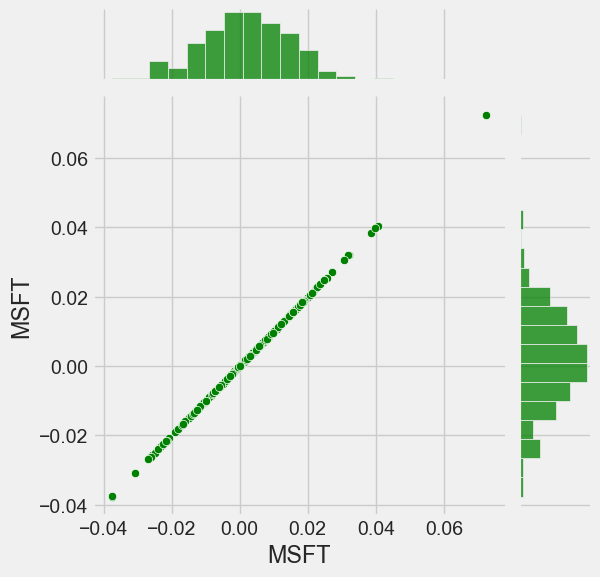

In [11]:
sns.jointplot(x='MSFT', y='MSFT', data=tech_rets, kind='scatter', color='Green')

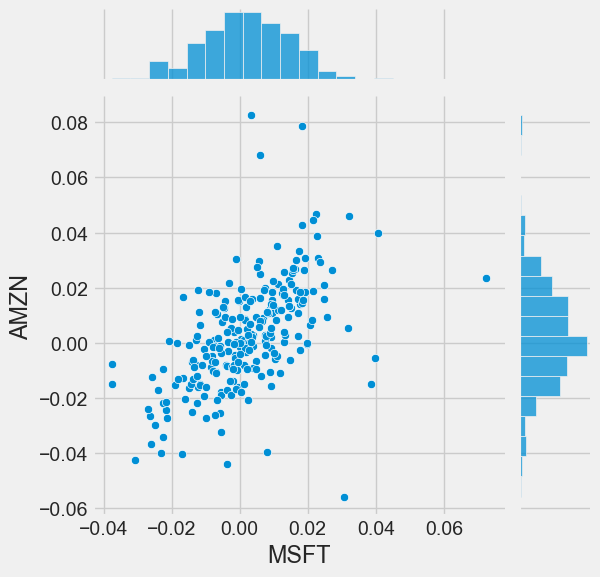

In [12]:
# We'll use joinplot to compare the daily returns of  Microsoft and Amazone
sns.jointplot(x='MSFT', y='AMZN', data=tech_rets, kind='scatter')

C:\Users\DELL\anaconda3\envs\tensor\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


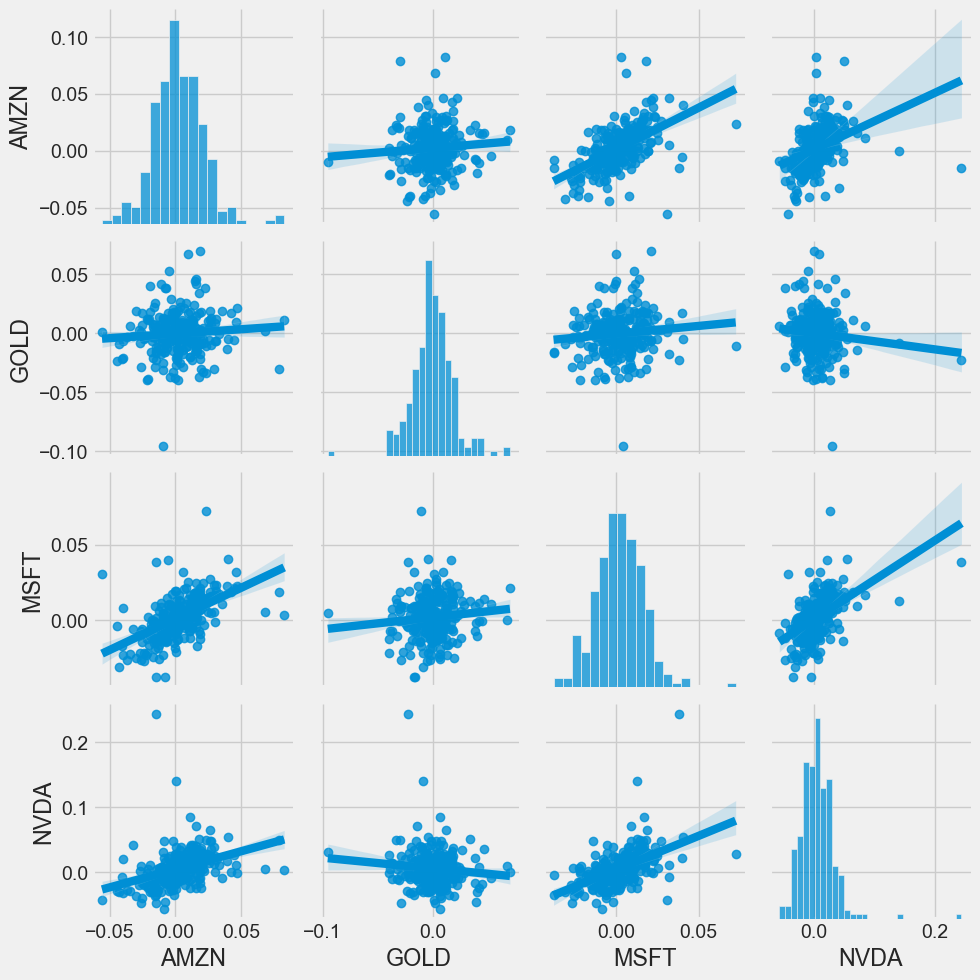

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

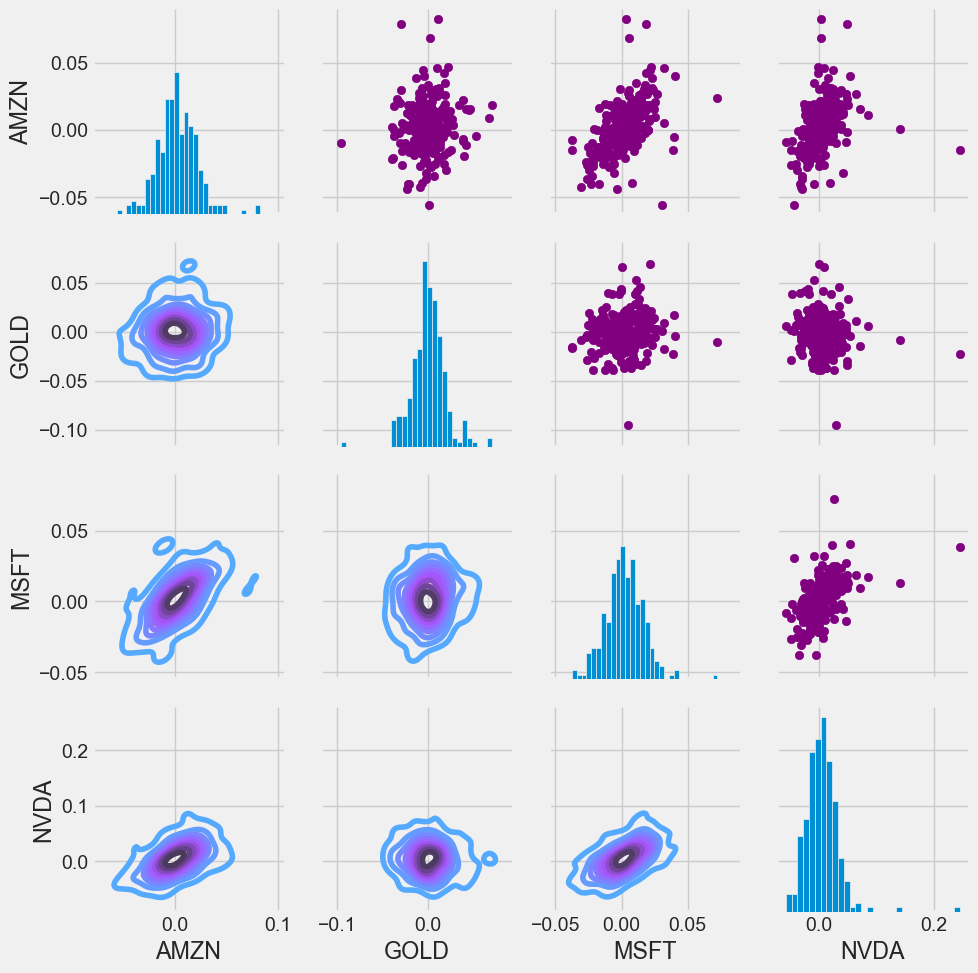

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

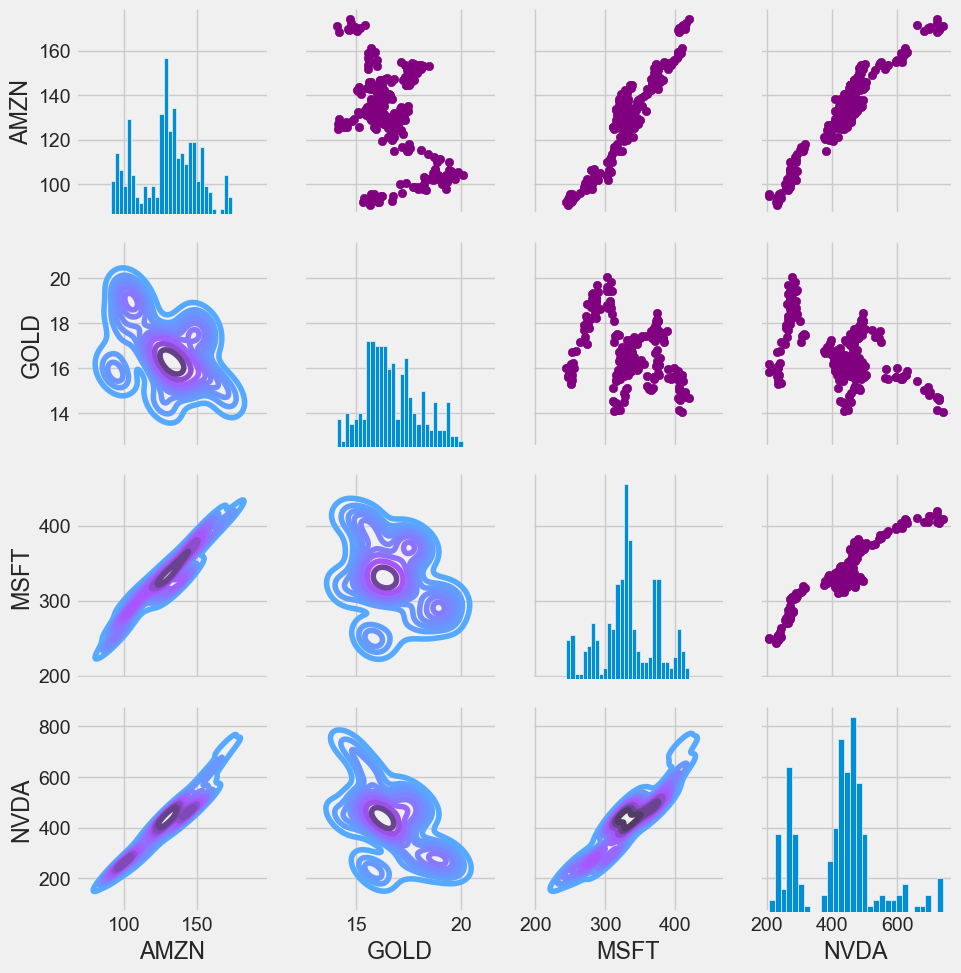

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

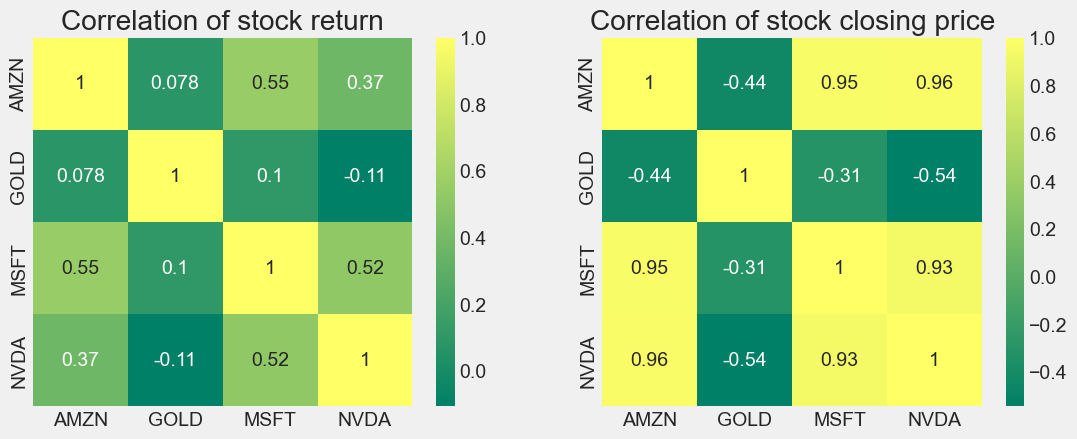

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

#  we put at risk by investing in a particular stock

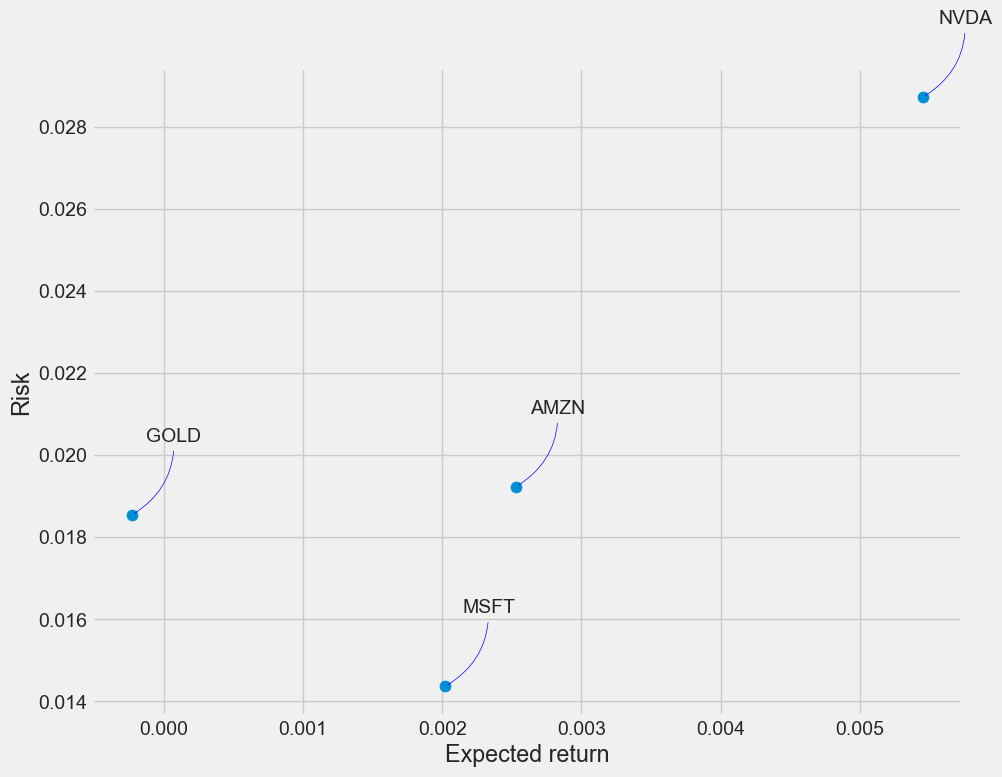

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Predicting the closing price stock price of MICROSOFT inc

In [18]:
# Get the stock quote
df = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238750,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738581,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960724,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301884,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008331,59706800
...,...,...,...,...,...,...
2024-02-12,420.559998,420.739990,414.750000,415.260010,414.493500,21202900
2024-02-13,404.940002,410.070007,403.390015,406.320007,405.570007,27824900
2024-02-14,408.070007,409.839996,404.570007,409.489990,409.489990,20401200


In [ ]:
#plot the base graph of closing price 

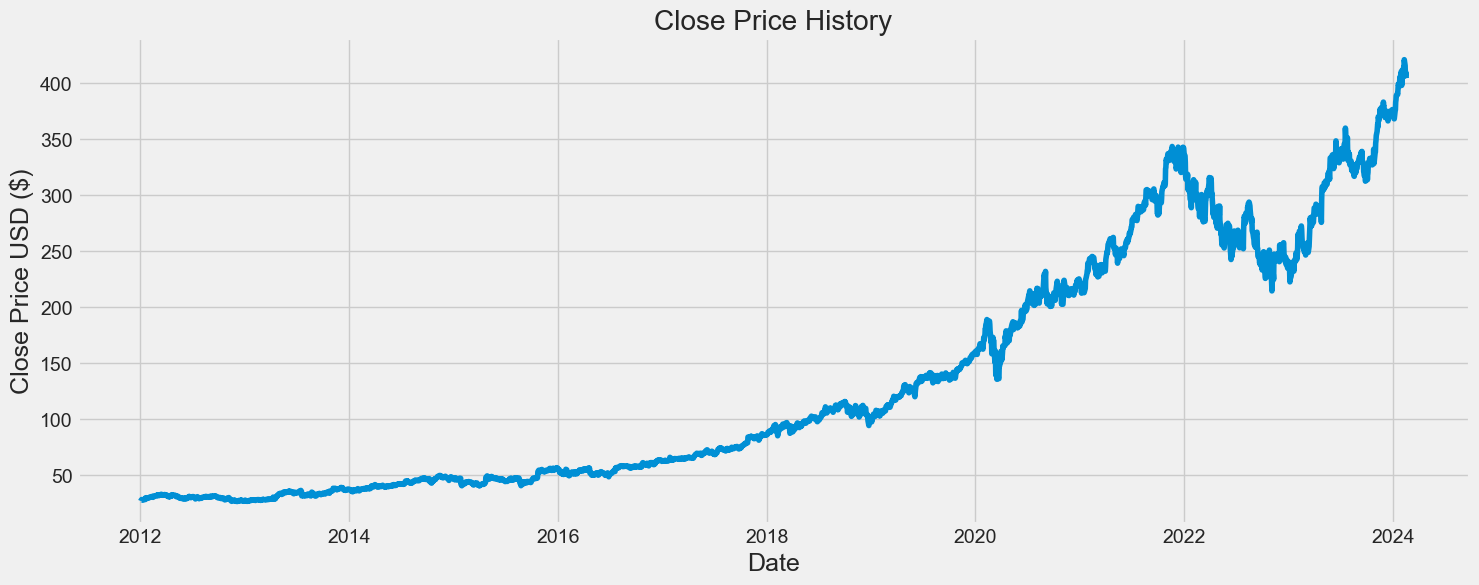

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# mean values of Apple stock price 

In [20]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2012-01-03           NaN
2012-01-04           NaN
2012-01-05           NaN
2012-01-06           NaN
2012-01-09           NaN
                 ...    
2024-02-12    364.213301
2024-02-13    365.068802
2024-02-14    365.968401
2024-02-15    366.863901
2024-02-16    367.729101
Name: Close, Length: 3051, dtype: float64

In [ ]:
# mean value of apple stock graph close price vs mean value price

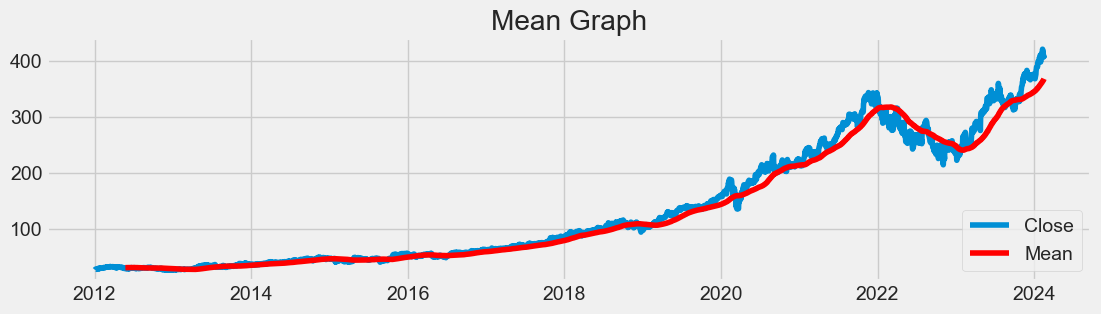

In [21]:
plt.figure(figsize = (12,3))
plt.title('Mean Graph')
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.legend(['Close','Mean'], loc='lower right')

In [22]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2899

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00101476],
       [0.00261302],
       [0.00332335],
       ...,
       [0.97194176],
       [0.96450862],
       [0.95816634]])

In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00101476, 0.00261302, 0.00332335, 0.00441423, 0.00347557,
       0.00372926, 0.00342483, 0.00413516, 0.00476939, 0.00479476,
       0.00471865, 0.0044396 , 0.00847328, 0.00852402, 0.00753463,
       0.00809275, 0.00794053, 0.00725557, 0.00821959, 0.00801664,
       0.00892993, 0.00908215, 0.00981785, 0.00971637, 0.01009691,
       0.01088335, 0.01116241, 0.01047745, 0.0106804 , 0.00984322,
       0.00933583, 0.01248161, 0.01238013, 0.01286214, 0.01243087,
       0.01268456, 0.01296362, 0.01263382, 0.01395302, 0.01362322,
       0.01501852, 0.01448577, 0.01377543, 0.01316657, 0.01387691,
       0.01430818, 0.01425744, 0.01438429, 0.01598254, 0.01623624,
       0.01643918, 0.01580496, 0.0147902 , 0.01425744, 0.01405449,
       0.01428281, 0.01430818, 0.01577959, 0.01560201, 0.01476482])]
[0.014587240050130304]

[array([0.00101476, 0.00261302, 0.00332335, 0.00441423, 0.00347557,
       0.00372926, 0.00342483, 0.00413516, 0.00476939, 0.00479476,
       0.00471865, 0.0044396 , 0.0

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2839/2839 [==============================] - 554s 192ms/step - loss: 9.1399e-04


In [26]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 3s 42ms/step


15.15479507024932

C:\Users\DELL\AppData\Local\Temp\ipykernel_13212\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


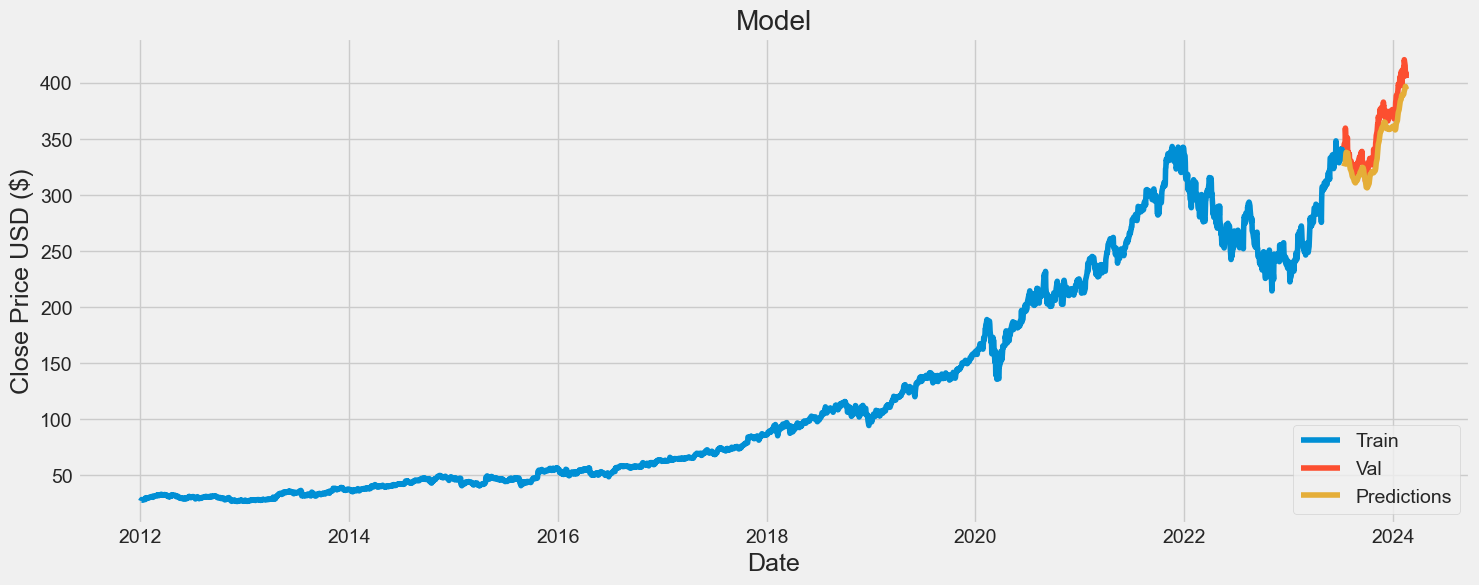

In [27]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
# Show the valid and predicted prices
valid 

,Close,Predictions
Date,,
2023-07-13,342.660004,325.377319
2023-07-14,345.239990,326.342560
2023-07-17,345.730011,328.066406
2023-07-18,359.489990,329.893585
2023-07-19,355.079987,333.666077
...,...,...
2024-02-12,415.260010,395.191254
2024-02-13,406.320007,396.698792
2024-02-14,409.489990,396.146667


In [29]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 40 days,MA for 60 days,MA for 80 days,Daily Return
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02,211.000000,191.000000,171.000000,249.000000
mean,333.401040,336.470961,330.490960,333.642480,332.099150,2.638468e+07,332.451386,332.633224,332.280844,0.002022
std,40.185729,40.250348,40.056389,40.226306,40.723275,9.866084e+06,29.185061,24.167922,19.010084,0.014368
min,246.550003,250.929993,245.610001,246.270004,244.265244,1.017660e+07,267.852652,278.161707,289.834222,-0.037638
25%,312.732491,315.580009,310.199989,313.452515,312.012894,2.092288e+07,322.804383,324.490189,324.599306,-0.007044
50%,332.014999,335.300003,328.574997,331.544998,329.873642,2.411275e+07,329.941259,330.892767,329.329190,0.001802
75%,368.227509,371.562508,365.829994,368.584991,367.904633,2.816930e+07,349.997309,343.899353,342.741849,0.010979
max,420.559998,420.820007,415.089996,420.549988,419.773712,7.847820e+07,392.175675,385.890163,377.765108,0.072435


# Predicting the closing price stock price of AMAZONE inc

In [30]:
# Get the stock quote
df = pdr.get_data_yahoo('AMZN', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,8.794500,8.974000,8.777500,8.951500,8.951500,102216000
2012-01-04,8.960500,9.025000,8.803500,8.875500,8.875500,84104000
2012-01-05,8.797000,8.912500,8.702500,8.880500,8.880500,76182000
2012-01-06,8.903500,9.232500,8.875000,9.130500,9.130500,140168000
2012-01-09,9.138000,9.218500,8.850000,8.928000,8.928000,101138000
...,...,...,...,...,...,...
2024-02-12,174.800003,175.389999,171.539993,172.339996,172.339996,51050400
2024-02-13,167.729996,170.949997,165.750000,168.639999,168.639999,56345100
2024-02-14,169.210007,171.210007,168.279999,170.979996,170.979996,42815500


In [ ]:
#plot the graph close price 

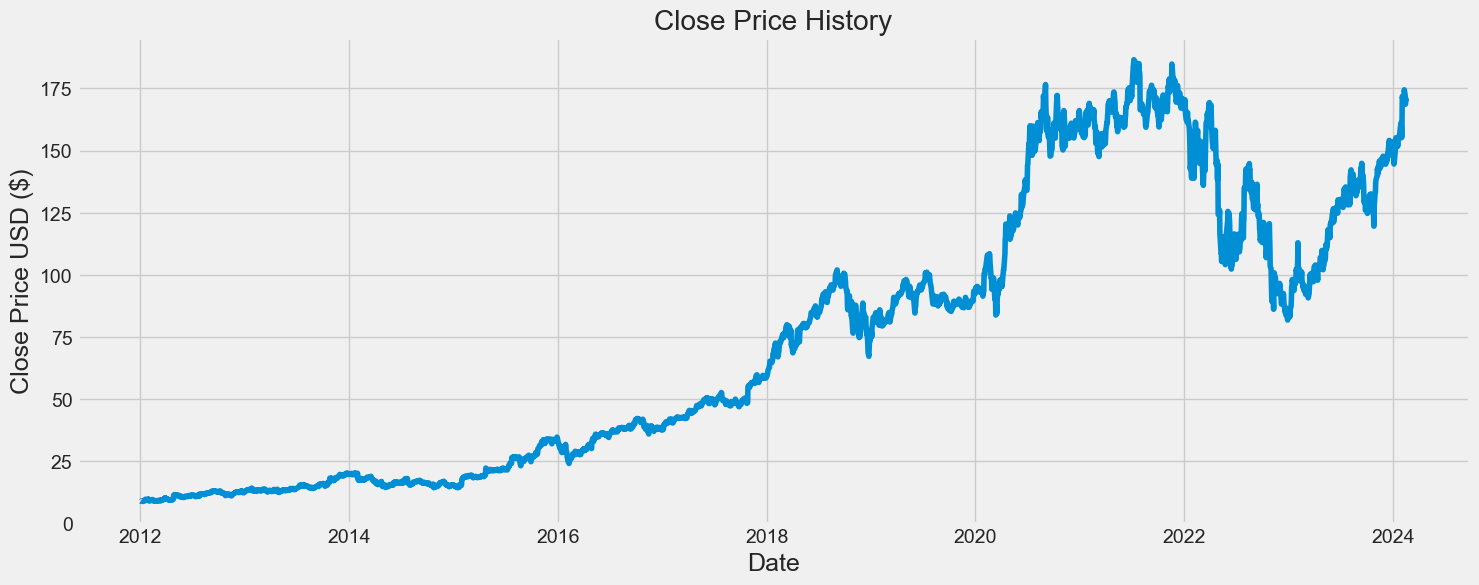

In [31]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# mean value price of apple stock price 

In [32]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2012-01-03         NaN
2012-01-04         NaN
2012-01-05         NaN
2012-01-06         NaN
2012-01-09         NaN
                ...   
2024-02-12    144.4492
2024-02-13    144.7827
2024-02-14    145.1992
2024-02-15    145.6060
2024-02-16    145.9884
Name: Close, Length: 3051, dtype: float64

In [ ]:
# plot the graph close price vs mean prices.

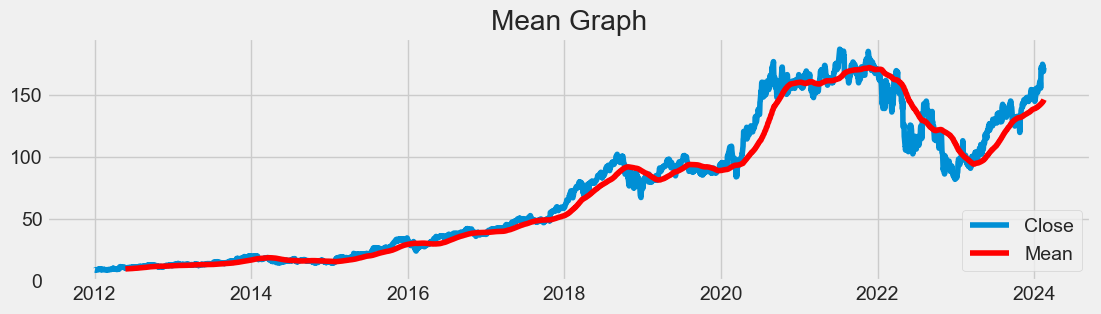

In [33]:
plt.figure(figsize = (12,3))
plt.title('Mean Graph')
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.legend(['Close','Mean'], loc='lower right')

In [34]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2899

In [35]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[8.71892048e-04],
       [4.44381751e-04],
       [4.72507993e-04],
       ...,
       [9.12301572e-01],
       [9.05663972e-01],
       [9.04032640e-01]])

In [36]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.00421884, 0.00285756, 0.0031135 ,
       0.00333851, 0.00489104, 0.00546762, 0.00456197, 0.00520605,
       0.00099283, 0.00162847, 0.00330476, 0.00202785, 0.00232318,
       0.00268599, 0.00254536, 0.00270287, 0.00440447, 0.0043229 ,
       0.00240193, 0.00112502, 0.00184785, 0.00178035, 0.00130784,
       0.00083252, 0.00090002, 0.00073127, 0.00221348, 0.00105752,
       0.00115596, 0.00094783, 0.00121783, 0.00145128, 0.00220505,
       0.00329351, 0.00235973, 0.00209817, 0.00243567, 0.00178035,
       0.00239068, 0.00256505, 0.00269724, 0.0046126 , 0.00444384,
       0.00463228, 0.0053748 , 0.00757704, 0.00829986, 0.00709609])]
[0.008066421706034416]

[array([0.00087189, 0.00044438, 0.00047251, 0.00187879, 0.0007397 ,
       0.00095908, 0.00083533, 0.        , 0.00070032, 0.0016116 ,
       0.00379977, 0.00520886, 0.0

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2839/2839 [==============================] - 188s 63ms/step - loss: 0.0014


In [41]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 28ms/step


3.633343524392182

C:\Users\DELL\AppData\Local\Temp\ipykernel_13212\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


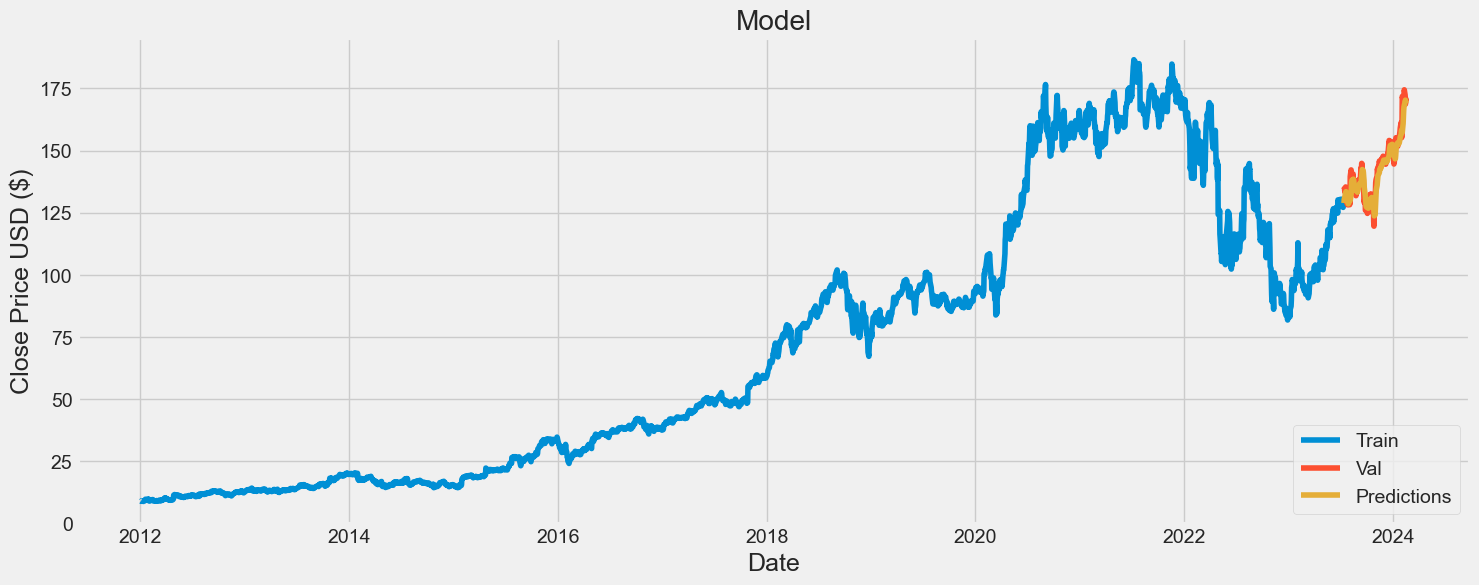

In [42]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [43]:
valid

,Close,Predictions
Date,,
2023-07-13,134.300003,128.884842
2023-07-14,134.679993,130.374969
2023-07-17,133.559998,131.886017
2023-07-18,132.830002,132.714676
2023-07-19,135.360001,132.907913
...,...,...
2024-02-12,172.339996,169.611832
2024-02-13,168.639999,170.290771
2024-02-14,170.979996,169.597168


In [44]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-05,170.199997,170.550003,167.699997,170.309998,170.309998,55081300
2024-02-06,169.389999,170.710007,167.649994,169.149994,169.149994,42505500
2024-02-07,169.479996,170.880005,168.940002,170.529999,170.529999,47174100
2024-02-08,169.649994,171.429993,168.880005,169.839996,169.839996,42316500
2024-02-09,170.899994,175.000000,170.580002,174.449997,174.449997,56986000
2024-02-12,174.800003,175.389999,171.539993,172.339996,172.339996,51050400
2024-02-13,167.729996,170.949997,165.750000,168.639999,168.639999,56345100
2024-02-14,169.210007,171.210007,168.279999,170.979996,170.979996,42815500
2024-02-15,170.580002,171.169998,167.589996,169.800003,169.800003,49855200


# # Predicting the closing price stock price of amazone inc

In [45]:
# Get the stock quote
df = pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2024-02-12,149.539993,150.589996,148.559998,148.729996,148.729996,17236100
2024-02-13,146.070007,148.039993,145.110001,146.369995,146.369995,18138500
2024-02-14,147.369995,147.830002,145.554993,147.139999,147.139999,16651800


In [ ]:
# mean value of close price 

In [46]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2012-01-03         NaN
2012-01-04         NaN
2012-01-05         NaN
2012-01-06         NaN
2012-01-09         NaN
                ...   
2024-02-12    138.2682
2024-02-13    138.3860
2024-02-14    138.5438
2024-02-15    138.6707
2024-02-16    138.7666
Name: Close, Length: 3051, dtype: float64

In [ ]:
# plot the graph close price vs mean price 

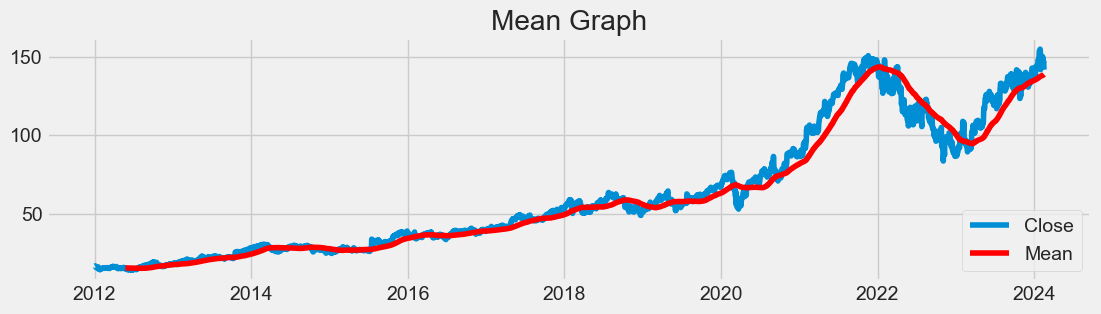

In [47]:
plt.figure(figsize = (12,3))
plt.title('Mean Graph')
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.legend(['Close','Mean'], loc='lower right')

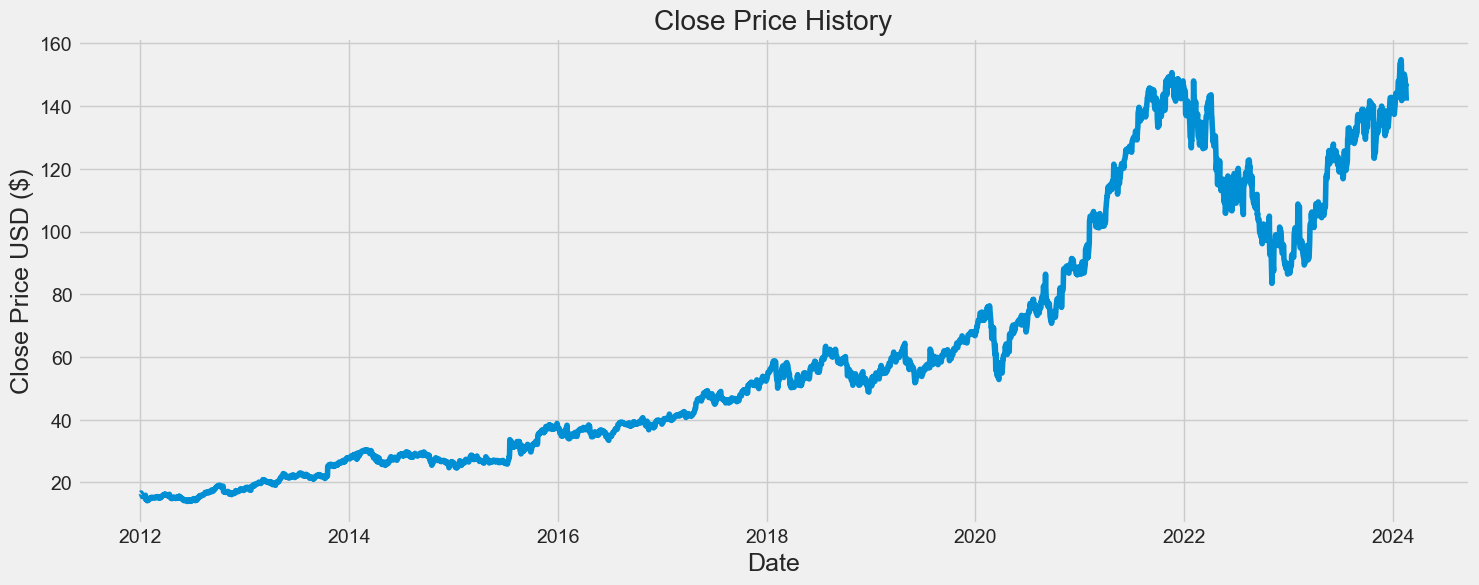

In [48]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [49]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .99 ))

training_data_len

3021

In [50]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01879894],
       [0.01930621],
       [0.01766775],
       ...,
       [0.94535752],
       [0.92264896],
       [0.90717869]])

In [51]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01879894, 0.01930621, 0.01766775, 0.0160788 , 0.01120761,
       0.01132779, 0.01182623, 0.01247666, 0.01165478, 0.01228931,
       0.01305463, 0.01423177, 0.0047616 , 0.00467853, 0.00386726,
       0.00184526, 0.00159957, 0.00369934, 0.00329459, 0.00372232,
       0.00384958, 0.00460606, 0.00658918, 0.00884449, 0.00843443,
       0.00897881, 0.00926337, 0.00828243, 0.00939417, 0.0089629 ,
       0.00822056, 0.00839024, 0.00805795, 0.00971231, 0.00864122,
       0.00831777, 0.00898765, 0.00888337, 0.01048824, 0.0104635 ,
       0.011197  , 0.01099374, 0.00975651, 0.00811451, 0.00843973,
       0.00849983, 0.00728203, 0.00814809, 0.01038042, 0.01006405,
       0.01097254, 0.01166362, 0.01324375, 0.01315714, 0.01430423,
       0.01537709, 0.01476555, 0.01595683, 0.01554855, 0.01709333])]
[0.015794227803033634]

[array([0.01879894, 0.01930621, 0.01766775, 0.0160788 , 0.01120761,
       0.01132779, 0.01182623, 0.01247666, 0.01165478, 0.01228931,
       0.01305463, 0.01423177, 0.0

In [52]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2961/2961 [==============================] - 122s 40ms/step - loss: 0.0011


In [54]:
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 1s/step


8.707236467584902

C:\Users\DELL\AppData\Local\Temp\ipykernel_13212\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


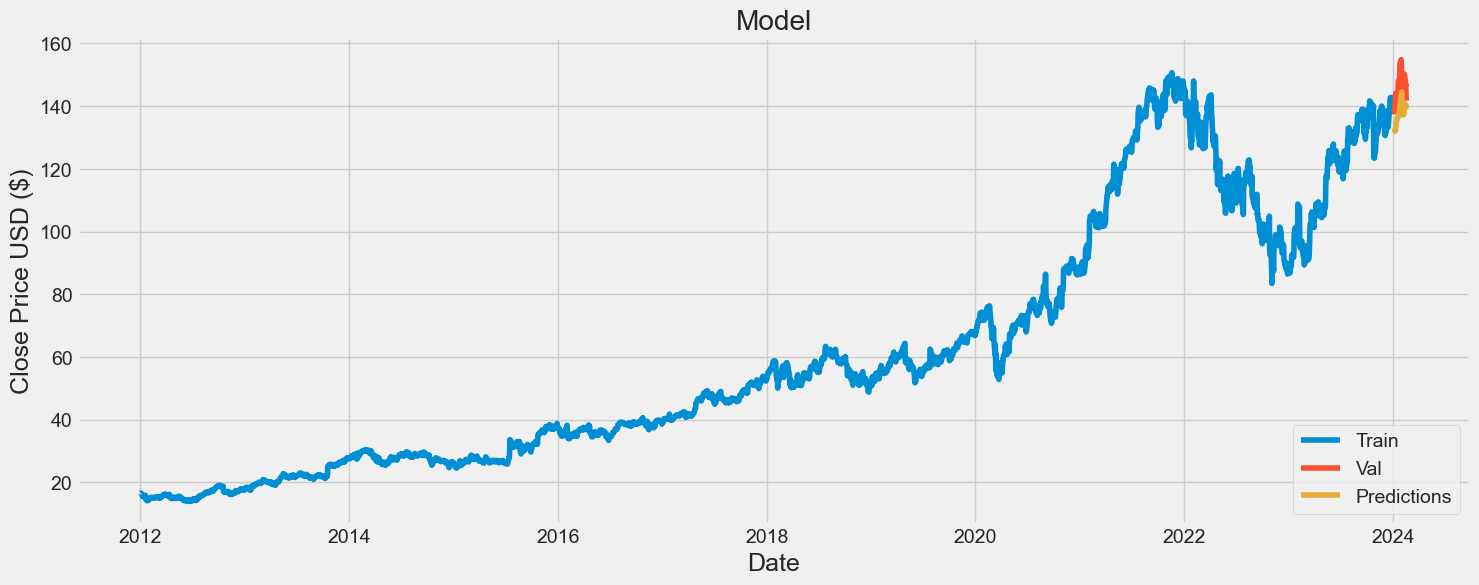

In [55]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [56]:
valid

,Close,Predictions
Date,,
2024-01-05,137.389999,132.771835
2024-01-08,140.529999,132.055206
2024-01-09,142.559998,132.273331
2024-01-10,143.800003,133.190338
2024-01-11,143.669998,134.374664
2024-01-12,144.240005,135.291458
2024-01-16,144.080002,136.013000
2024-01-17,142.889999,136.425888
2024-01-18,144.990005,136.342728


In [57]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-12,149.539993,150.589996,148.559998,148.729996,148.729996,17236100
2024-02-13,146.070007,148.039993,145.110001,146.369995,146.369995,18138500
2024-02-14,147.369995,147.830002,145.554993,147.139999,147.139999,16651800
2024-02-15,144.460007,144.759995,141.880005,143.940002,143.940002,26724300
2024-02-16,144.210007,144.479996,141.520004,141.759995,141.759995,21849700


# Predicting the closing price stock price of MSFT  inc

In [58]:
# Get the stock quote
df = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238750,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738579,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960730,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301888,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008333,59706800
...,...,...,...,...,...,...
2024-02-12,420.559998,420.739990,414.750000,415.260010,414.493500,21202900
2024-02-13,404.940002,410.070007,403.390015,406.320007,405.570007,27824900
2024-02-14,408.070007,409.839996,404.570007,409.489990,409.489990,20401200


In [ ]:
# mean value of close price 

In [59]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2012-01-03           NaN
2012-01-04           NaN
2012-01-05           NaN
2012-01-06           NaN
2012-01-09           NaN
                 ...    
2024-02-12    364.213301
2024-02-13    365.068802
2024-02-14    365.968401
2024-02-15    366.863901
2024-02-16    367.729101
Name: Close, Length: 3051, dtype: float64

In [ ]:

# plot the graph mean value of close price and mean value 

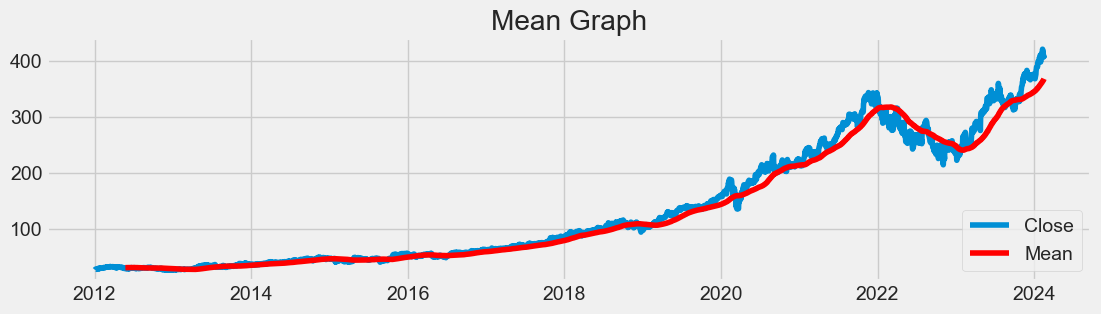

In [60]:
plt.figure(figsize = (12,3))
plt.title('Mean Graph')
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.legend(['Close','Mean'], loc='lower right')

In [ ]:
# plot the the 

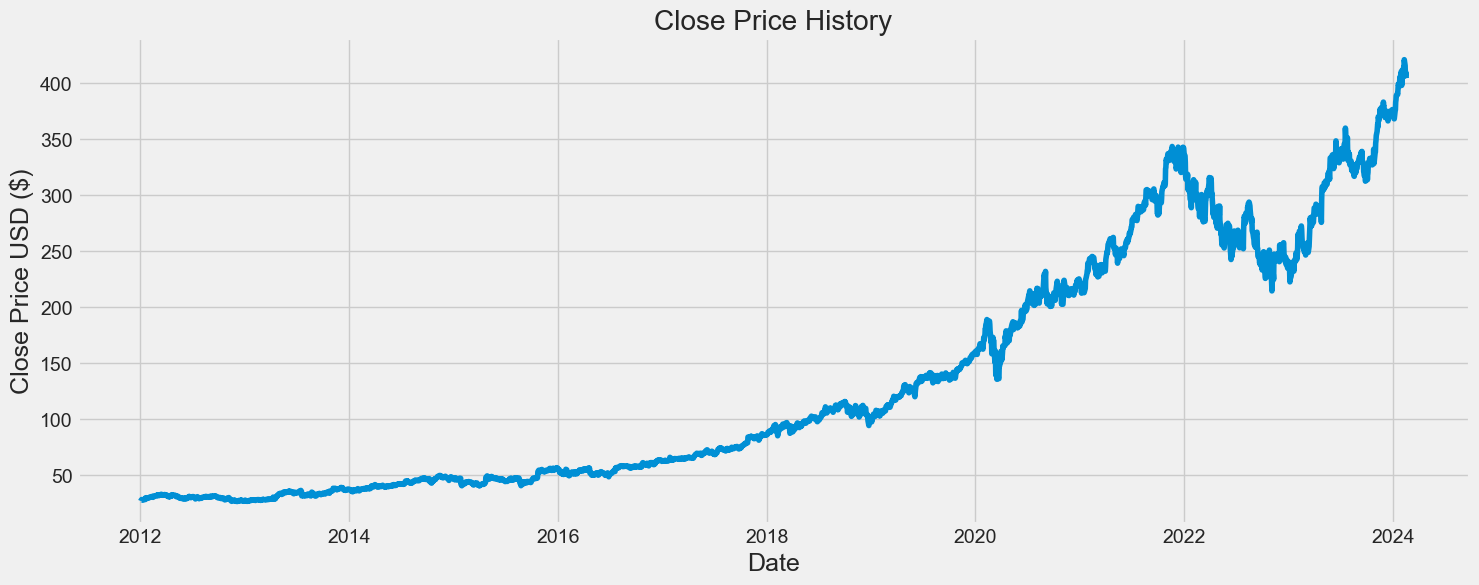

In [61]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [62]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .99 ))

training_data_len

3021

In [63]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00101476],
       [0.00261302],
       [0.00332335],
       ...,
       [0.97194176],
       [0.96450862],
       [0.95816634]])

In [64]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00101476, 0.00261302, 0.00332335, 0.00441423, 0.00347557,
       0.00372926, 0.00342483, 0.00413516, 0.00476939, 0.00479476,
       0.00471865, 0.0044396 , 0.00847328, 0.00852402, 0.00753463,
       0.00809275, 0.00794053, 0.00725557, 0.00821959, 0.00801664,
       0.00892993, 0.00908215, 0.00981785, 0.00971637, 0.01009691,
       0.01088335, 0.01116241, 0.01047745, 0.0106804 , 0.00984322,
       0.00933583, 0.01248161, 0.01238013, 0.01286214, 0.01243087,
       0.01268456, 0.01296362, 0.01263382, 0.01395302, 0.01362322,
       0.01501852, 0.01448577, 0.01377543, 0.01316657, 0.01387691,
       0.01430818, 0.01425744, 0.01438429, 0.01598254, 0.01623624,
       0.01643918, 0.01580496, 0.0147902 , 0.01425744, 0.01405449,
       0.01428281, 0.01430818, 0.01577959, 0.01560201, 0.01476482])]
[0.014587240050130304]

[array([0.00101476, 0.00261302, 0.00332335, 0.00441423, 0.00347557,
       0.00372926, 0.00342483, 0.00413516, 0.00476939, 0.00479476,
       0.00471865, 0.0044396 , 0.0

In [65]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2961/2961 [==============================] - 131s 43ms/step - loss: 8.4522e-04


In [66]:
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 3s 3s/step


9.806367898367332

C:\Users\DELL\AppData\Local\Temp\ipykernel_10228\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


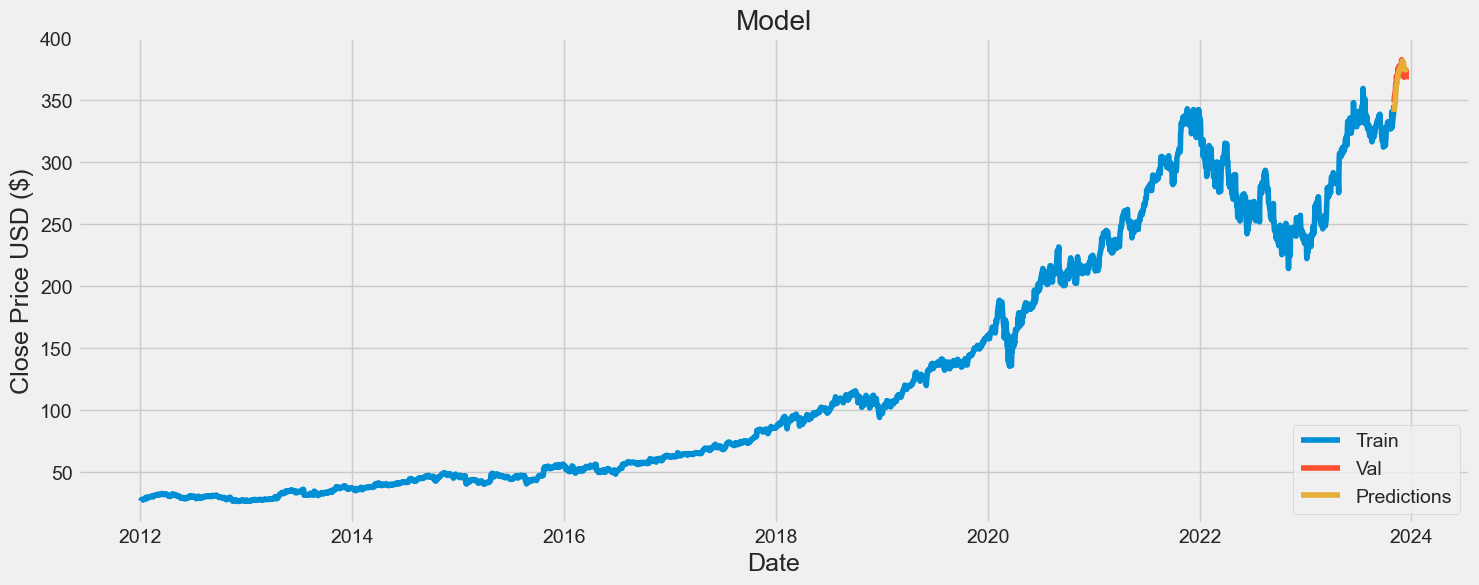

In [61]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [67]:
valid

,Close,Predictions
Date,,
2024-01-05,137.389999,132.771835
2024-01-08,140.529999,132.055206
2024-01-09,142.559998,132.273331
2024-01-10,143.800003,133.190338
2024-01-11,143.669998,134.374664
2024-01-12,144.240005,135.291458
2024-01-16,144.080002,136.013000
2024-01-17,142.889999,136.425888
2024-01-18,144.990005,136.342728


In [68]:
df.tail(10)   

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-05,409.899994,411.160004,403.989990,405.649994,404.901245,25352300
2024-02-06,405.880005,407.970001,402.910004,405.489990,404.741516,18382600
2024-02-07,407.440002,414.299988,407.399994,414.049988,413.285706,22340500
2024-02-08,414.049988,415.559998,412.529999,414.109985,413.345612,21225300
2024-02-09,415.250000,420.820007,415.089996,420.549988,419.773712,22032800
2024-02-12,420.559998,420.739990,414.750000,415.260010,414.493500,21202900
2024-02-13,404.940002,410.070007,403.390015,406.320007,405.570007,27824900
2024-02-14,408.070007,409.839996,404.570007,409.489990,409.489990,20401200
2024-02-15,408.140015,409.130005,404.290009,406.559998,406.559998,21825500


In [ ]:
0